In [15]:
import pandas as pd
import datetime as dt
import requests

from datetime import datetime as dt

datay='https://cloud.iexapis.com/stable/stock/aapl/chart/1y?token=pk_a4d36832d58c4fc5aef7b5ee188d48ce'
datad='https://cloud.iexapis.com/stable/stock/aapl/chart/1d?token=pk_a4d36832d58c4fc5aef7b5ee188d48ce'
dataday='https://cloud.iexapis.com/stable/stock/aapl/intraday-prices/batch?token=pk_a4d36832d58c4fc5aef7b5ee188d48ce'
import json
dd= requests.get(datad)
dy= requests.get(datay)
dday= requests.get(dataday)
datad=json.loads(dd.text)
datay=json.loads(dy.text)
dataday=json.loads(dday.text)
for i in datay:
    i['minute'] = i.get('minute','09:30')
for i in datay:
      string= i['date']+'T'+i['minute']+':00+00:00'
      element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
      timestamp= dt.timestamp(element)
      i['timestamps']= i.get('timestamps',timestamp)
for i in datad:
       string= i['date']+'T'+i['minute']+':00+00:00'
       element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
       timestamp= dt.timestamp(element)     
       i['timestamps']= i.get('timestamps', timestamp)
for i in dataday:
        string= i['date']+'T'+i['minute']+':00+00:00'
        element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
        timestamp= dt.timestamp(element)
        i['timestamps']= i.get('timestamps', timestamp)
      
df1= pd.DataFrame(datay)
df2= pd.DataFrame(datad)
df3= pd.DataFrame(dataday)
      
frames =[df1,df2,df3]
final =pd.concat(frames)
final= final.drop(['date','close','high','low','volume','uOpen','uHigh','uLow','uVolume','change','label','changeOverTime','minute','uClose','changePercent','average','notional','numberOfTrades'],axis=1)
print(final.head())

    open    timestamps
0  56.98  1.570700e+09
1  58.24  1.570786e+09
2  58.73  1.571045e+09
3  59.10  1.571132e+09
4  58.34  1.571218e+09


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
array = final.values
X = array[:,1]
X = X.reshape(-1,1)
y = array[:,0]
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=3)

models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=3, random_state=1, shuffle=True)
    cv_score = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_score)
    names.append(name)
    scores = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(scores)

 LR : 0.907492 (0.015514)
 LASSO : 0.907492 (0.015514)
 EN : 0.907492 (0.015514)
 KNN : 0.993213 (0.000289)
 CART : 0.993502 (0.002498)
 SVR : 0.969242 (0.006306)


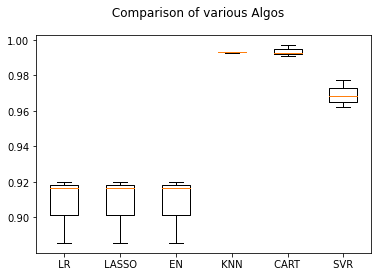

In [21]:
fig = plt.figure()
fig.suptitle(' Comparison of various Algos ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print(r2_score(y_val, predictions))

0.9940250764416401


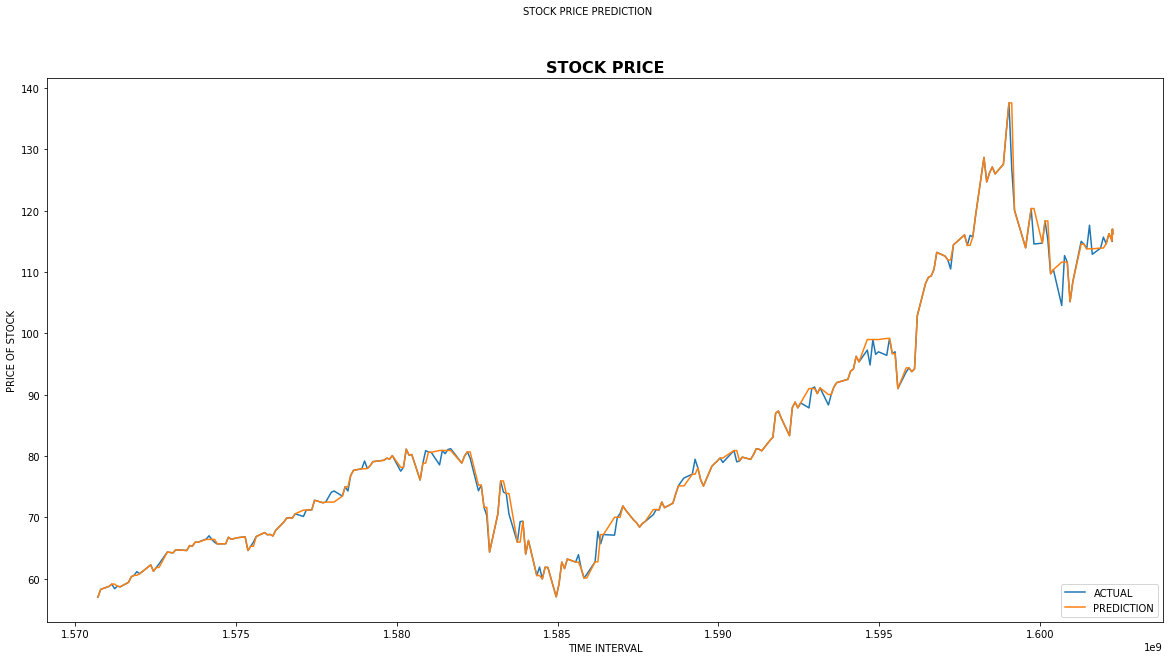

In [24]:
figure = plt.figure(figsize=(20,10))
plt.plot(X, y, label="ACTUAL")
plt.plot(X, model.predict(X.reshape(-1,1)), label="PREDICTION")
plt.legend(loc='lower right')
plt.title("STOCK PRICE", fontsize=16, fontweight='bold')
plt.suptitle("STOCK PRICE PREDICTION", fontsize=10)
plt.xlabel("TIME INTERVAL")
plt.ylabel("PRICE OF STOCK")
plt.show()
